# Churn Prediction

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

colors = ["#005F73","#0A9396","#94D2BD","#E9D8A6", "#EE9B00","#CA6702","#BB3E03","#AE2012","#9B2226"]

# Variable Descriptions 

* RowNumber—corresponds to the record (row) number and has no effect on the output.
* CustomerId—contains random values and has no effect on customer leaving the bank.
* Surname—the surname of a customer has no impact on their decision to leave the bank.
* CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
* Geography—a customer’s location can affect their decision to leave the bank.
* Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
* Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
* Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
* Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
* NumOfProducts—refers to the number of products that a customer has purchased through the bank.
* HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
* IsActiveMember—active customers are less likely to leave the bank.
* EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* Exited—whether or not the customer left the bank.

In [2]:
df_c = pd.read_csv("churn2.csv")
df = df_c.copy()
df.head(5)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
def check_df(dataframe, head=5):
    """
    This Function returns:
        - shape : The dimension of dataframe.
        - size : Number of elements in the dataframe.
        - type : The data type of each variable.
        - Head : The first "n" rows of the DataFrame.
        - Tail : The last "n" rows of the DataFrame.
        - Null Values : Checking if any "NA" Value is into DataFrame
        - quantile : The Basics Statistics

    Parameters
    ----------
    dataframe : dataframe
        Dataframe where the dataset is kept.
    head : int, optional
        The function which is used to get the first "n" rows.

    Returns
    -------

    Examples
    ------
        import pandas as pd
        df = pd.read_csv("titanic.csv")
        print(check_df(df,10))
    """
    print("################################ Shape ##################################")
    print(dataframe.shape)
    print("################################# Size ##################################")
    print(dataframe.size)
    print("################################# Type ##################################")
    print(dataframe.dtypes)
    print("############################ Column Names ###############################")
    print(dataframe.columns)
    print("################################# Head ##################################")
    print(dataframe.head(head))
    print("################################# Tail ##################################")
    print(dataframe.tail(head))
    print("############################## Null Values ##############################")
    print(dataframe.isnull().values.any())
    print("############################## Quantiles ################################")
    print(dataframe.quantile(q=[0, 0.25, 0.50, 0.75,1]))

check_df(df)

################################ Shape ##################################
(10000, 14)
################################# Size ##################################
140000
################################# Type ##################################
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
############################ Column Names ###############################
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
################################# Head #############################

# Variable Types

In [4]:
def grab_col_names(dataframe, cat_th=10, car_th=50):
    """
    This function to perform the selection of numeric and categorical variables in the data set in a parametric way.
    Note: Variables with numeric data type but with categorical properties are included in categorical variables.

    Parameters
    ----------
    dataframe: dataframe
        The data set in which Variable types need to be parsed
    cat_th: int, optional
        The threshold value for number of distinct observations in numerical variables with categorical properties.
        cat_th is used to specify that if number of distinct observations in numerical variable is less than
        cat_th, this variables can be categorized as a categorical variable.

    car_th: int, optional
        The threshold value for categorical variables with  a wide range of cardinality.
        If the number of distinct observations in a categorical variables is greater than car_th, this
        variable can be categorized as a categorical variable.

    Returns
    -------
        cat_cols: list
            List of categorical variables.
        num_cols: list
            List of numerical variables.
        cat_but_car: list
            List of categorical variables with  a wide range of cardinality.
        date_cols: list
            List of variables in date format
    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        Sum of elements in lists the cat_cols,num_cols  and  cat_but_car give the total number of variables in dataframe.
    """
    # cat cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and
                   dataframe[col].nunique() < cat_th]

    cat_but_car = [col for col in df.columns if dataframe[col].dtypes == "O" and
                   dataframe[col].nunique() > car_th]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    num_cols = [col for col in num_cols if "ID" not in col]

    date_cols = [col for col in dataframe.columns if ("date" in col.lower() or "time" in col.lower())]

    return {"Categorical_Data": cat_cols,
            "Numerical_Data": num_cols,
            "Categorical_But_Cardinal_Data": cat_but_car,
            "Date_Cols" : date_cols}

grab_col_names(df)

{'Categorical_Data': ['Geography',
  'Gender',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'Exited'],
 'Numerical_Data': ['RowNumber',
  'CustomerId',
  'CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'EstimatedSalary'],
 'Categorical_But_Cardinal_Data': ['Surname'],
 'Date_Cols': []}

########## Summary Statistics of RowNumber ############
                   count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   

                         25%           50%           75%         100%  \
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00   
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00   
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00   
Age                    32.00  3.700000e+01  4.400000e+01        92.00   
Tenure                  3.

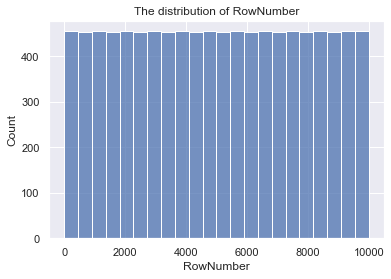

########## Summary Statistics of CustomerId ############
                   count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   

                         25%           50%           75%         100%  \
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00   
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00   
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00   
Age                    32.00  3.700000e+01  4.400000e+01        92.00   
Tenure                  3

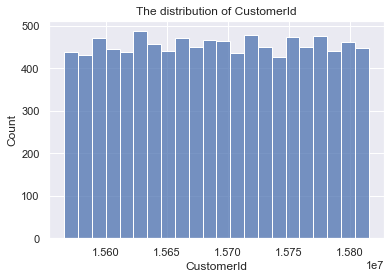

########## Summary Statistics of CreditScore ############
                   count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   

                         25%           50%           75%         100%  \
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00   
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00   
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00   
Age                    32.00  3.700000e+01  4.400000e+01        92.00   
Tenure                  

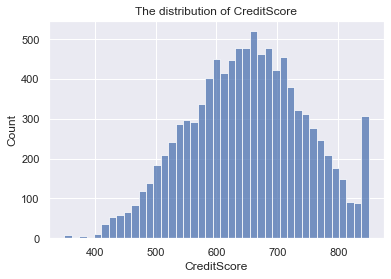

########## Summary Statistics of Age ############
                   count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   

                         25%           50%           75%         100%  \
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00   
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00   
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00   
Age                    32.00  3.700000e+01  4.400000e+01        92.00   
Tenure                  3.00  5.

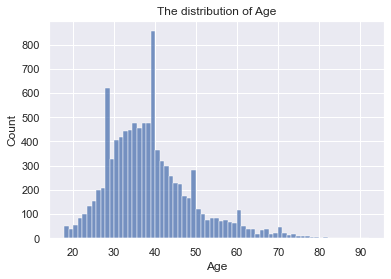

########## Summary Statistics of Tenure ############
                   count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   

                         25%           50%           75%         100%  \
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00   
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00   
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00   
Age                    32.00  3.700000e+01  4.400000e+01        92.00   
Tenure                  3.00 

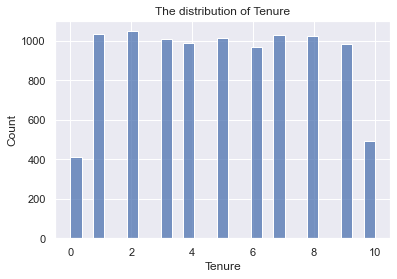

########## Summary Statistics of Balance ############
                   count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   

                         25%           50%           75%         100%  \
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00   
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00   
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00   
Age                    32.00  3.700000e+01  4.400000e+01        92.00   
Tenure                  3.00

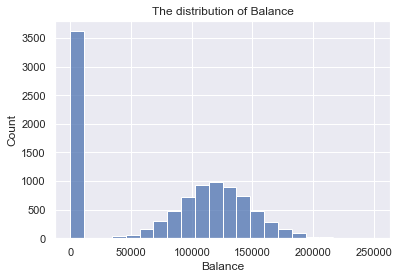

########## Summary Statistics of EstimatedSalary ############
                   count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   

                         25%           50%           75%         100%  \
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00   
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00   
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00   
Age                    32.00  3.700000e+01  4.400000e+01        92.00   
Tenure              

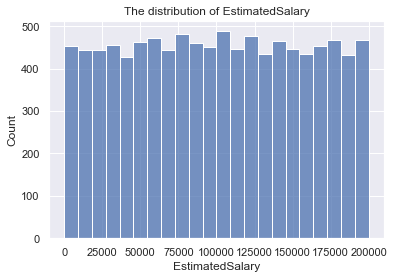

In [5]:
def num_summary(dataframe,  plot=True):
    """
    This Function returns:
        - count
        - mean 
        - std 
        - min, max values  
        - quantile : 25%, 50%, 75%, 100%
        - histogram graph

    Parameters
    ----------
    dataframe : dataframe
        Dataframe where the dataset is kept.

    """    
    numerical_col = grab_col_names(dataframe)["Numerical_Data"]
    quantiles = [0.25, 0.50, 0.75, 1]
    for col_name in numerical_col:
        print("########## Summary Statistics of " +  col_name + " ############")
        print(dataframe[numerical_col].describe(quantiles).T)

        if plot:
            sns.histplot(data=dataframe, x=col_name)
            plt.xlabel(col_name)
            plt.title("The distribution of "+ col_name)
            plt.show(block=True)

num_summary(df)

In [6]:
df.shape

(10000, 14)

In [7]:
df.drop('RowNumber', axis = 1, inplace = True)
df.drop('CustomerId', axis = 1, inplace = True)
df.drop('Surname', axis = 1, inplace = True)

In [8]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# Exploratory Data Analysis

In [9]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

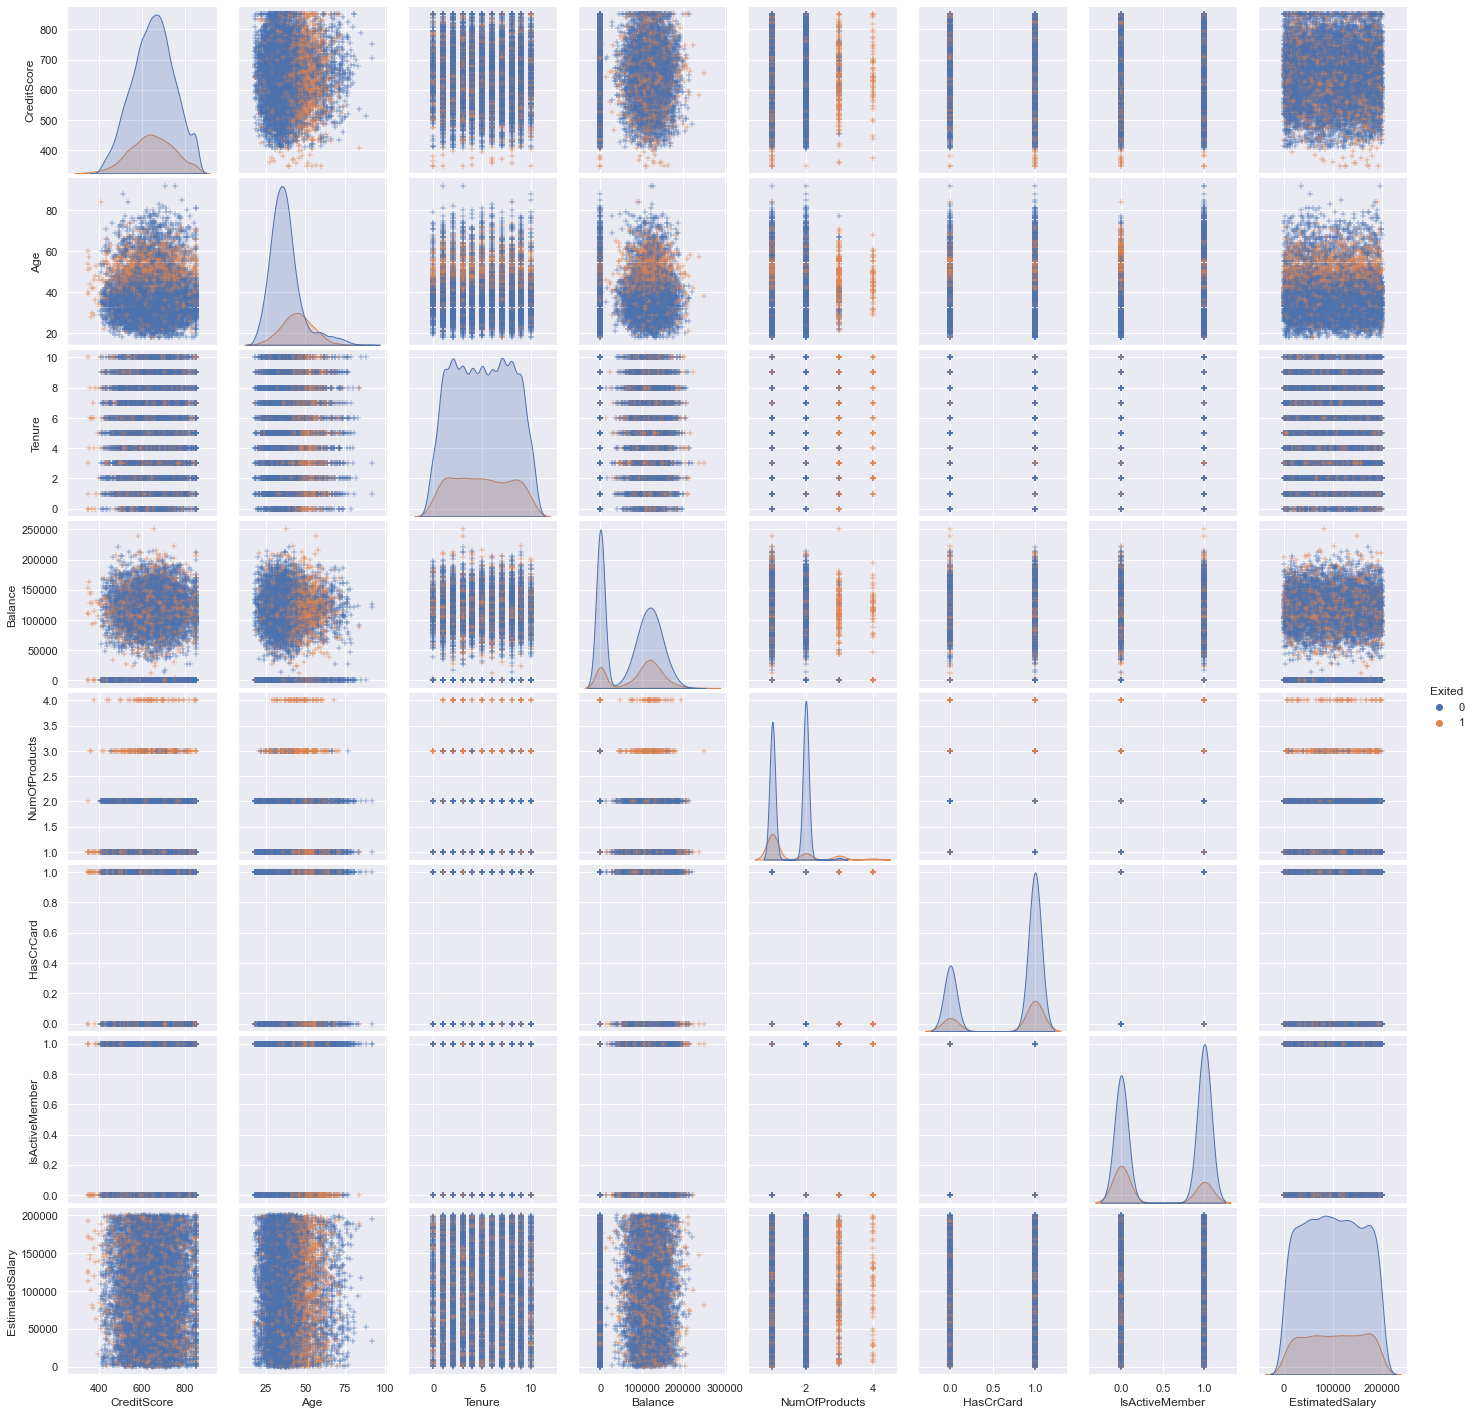

In [10]:
sns.pairplot(df, hue = 'Exited', markers='+')

## Churn Distribution

Text(0.5, 1.0, 'Churn Distribution')

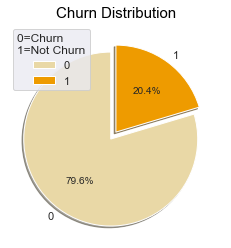

In [11]:
labels = df['Exited'].value_counts().index
sizes = df['Exited'].value_counts().values

myexplode = [0.1, 0]
plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, colors=colors[3:5], autopct='%1.1f%%')
plt.legend(title = "0=Churn \n1=Not Churn",loc='upper left')
plt.title(f'Churn Distribution',color = 'black',fontsize = 15)

## Gender Distribution

In [12]:
df[["Gender","Exited"]].groupby(["Gender"], as_index = False).count().sort_values(by="Exited",ascending = False)

Gender  Exited
1    Male    5457
0  Female    4543

Text(0.5, 1.0, 'Gender Distribution')

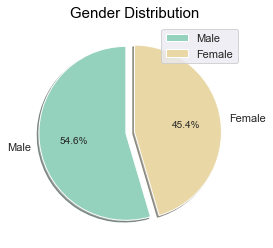

In [13]:
labels = df['Gender'].value_counts().index
sizes = df['Gender'].value_counts().values
myexplode = [0.1, 0]

plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, colors=colors[2:4], autopct='%1.1f%%')
plt.legend()
plt.title(f'Gender Distribution',color = 'black',fontsize = 15)

<AxesSubplot:title={'center':'Gender = Male'}, xlabel='Exited'>

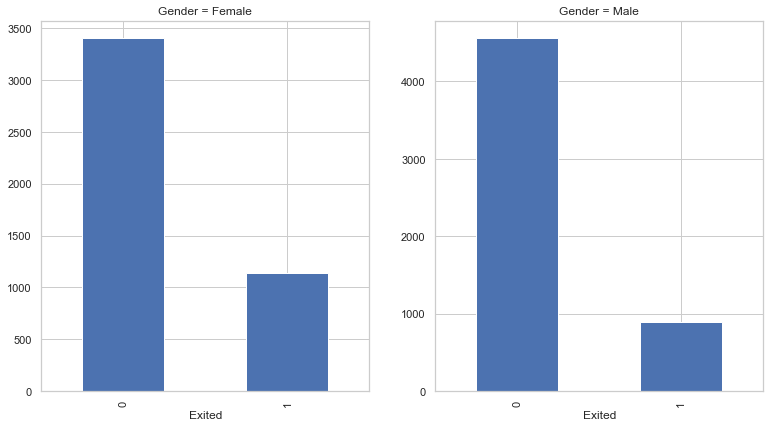

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
plt.title('Gender = Female')
df.groupby('Gender').Exited.value_counts().loc['Female'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('Gender = Male')
df.groupby('Gender').Exited.value_counts().loc['Male'].plot(kind='bar')

In [15]:
df.groupby('Gender').Exited.value_counts().loc['Female']

Exited
0    3404
1    1139
Name: Exited, dtype: int64

In [16]:
df.groupby('Gender').Exited.value_counts().loc['Male']

Exited
0    4559
1     898
Name: Exited, dtype: int64

## Geography

In [17]:
df[["Geography","Exited"]].groupby(["Geography"], as_index = False).count().sort_values(by="Exited",ascending = False)

Geography  Exited
0    France    5014
1   Germany    2509
2     Spain    2477

Text(0.5, 1.0, 'Distribution of Customers Locations')

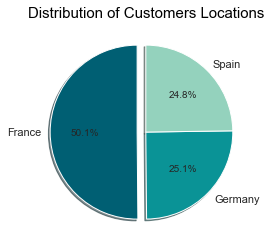

In [18]:
labels = df['Geography'].value_counts().index
sizes = df['Geography'].value_counts().values

myexplode = [0.1, 0, 0]

plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%')
plt.title(f'Distribution of Customers Locations',color = 'black',fontsize = 15)

<AxesSubplot:title={'center':'Geography = Spain'}, xlabel='Exited'>

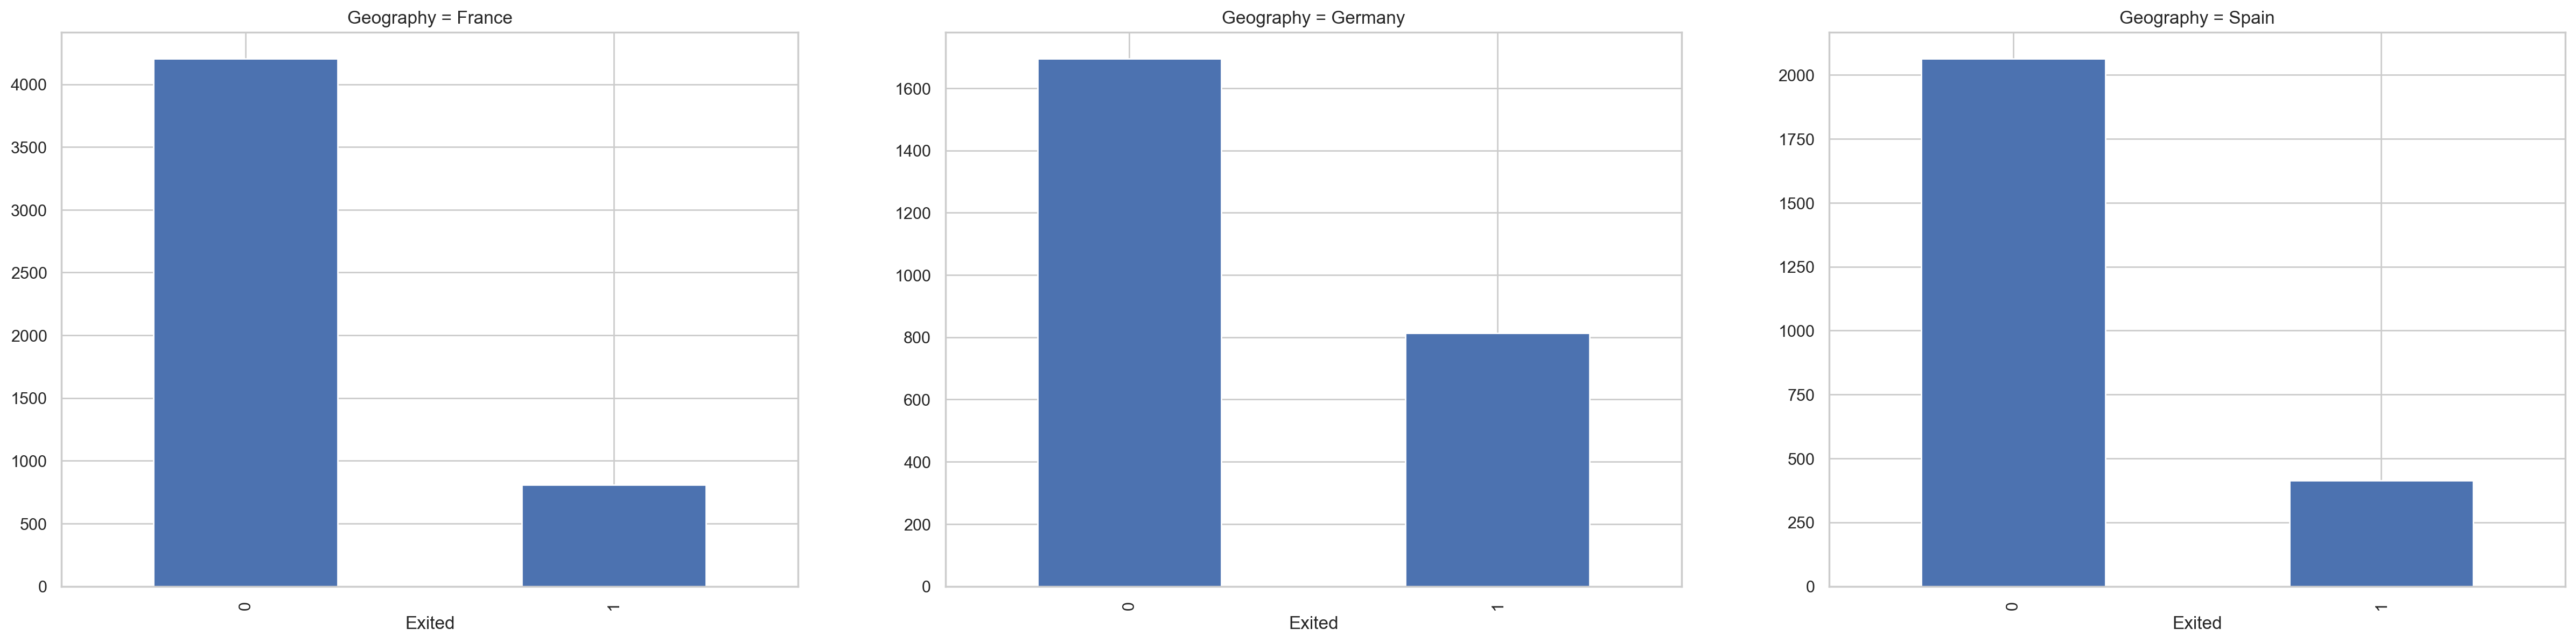

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(30,15), dpi = 200)
plt.subplot(2,3,1)
plt.title('Geography = France')
df.groupby('Geography').Exited.value_counts().loc['France'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('Geography = Germany')
df.groupby('Geography').Exited.value_counts().loc['Germany'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('Geography = Spain')
df.groupby('Geography').Exited.value_counts().loc['Spain'].plot(kind='bar')

In [20]:
df.groupby('Geography').Exited.value_counts().loc['Germany']

Exited
0    1695
1     814
Name: Exited, dtype: int64

In [21]:
df.groupby('Geography').Exited.value_counts().loc['France']

Exited
0    4204
1     810
Name: Exited, dtype: int64

In [22]:
df.groupby('Geography').Exited.value_counts().loc['Spain']

Exited
0    2064
1     413
Name: Exited, dtype: int64

## Credit Score

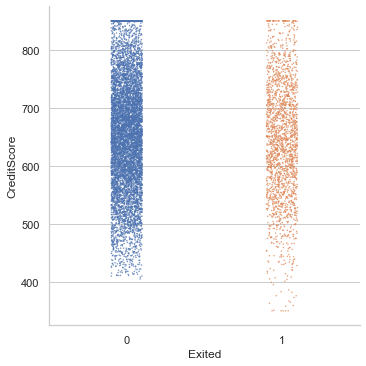

In [23]:
sns.catplot("Exited", "CreditScore", data = df, alpha=0.75, s = 1.5)

Text(0.5, 1.0, 'CreditScore Interval and Counts')

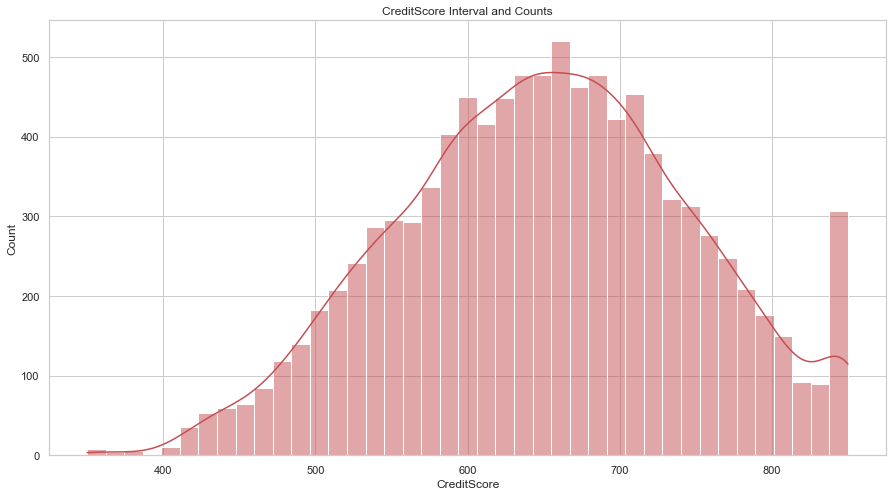

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.histplot(df['CreditScore'], color='r', kde = True).set_title('CreditScore Interval and Counts')

## Age

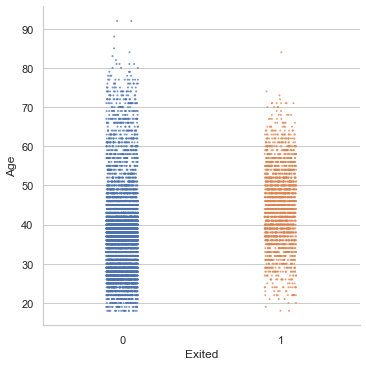

In [25]:
sns.catplot("Exited", "Age", data = df, alpha=0.75, s = 2)

Text(0.5, 1.0, 'Age Interval and Counts')

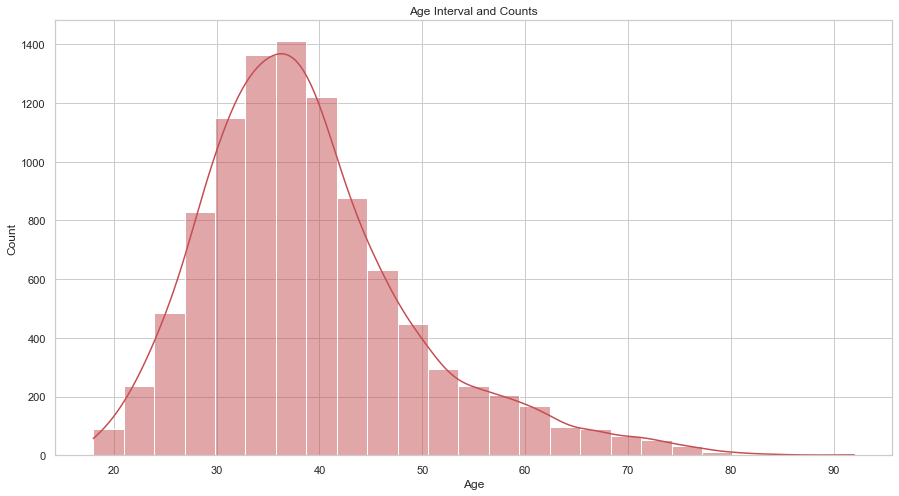

In [26]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.histplot(df['Age'], color='r', bins = 25, kde = True).set_title('Age Interval and Counts')

## Balance

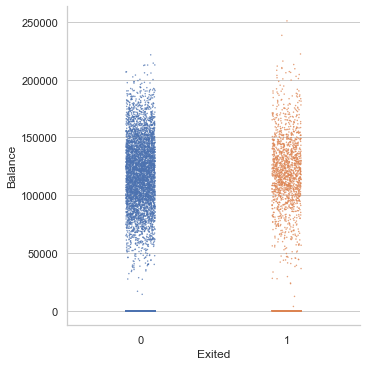

In [27]:
sns.catplot("Exited", "Balance", data = df, alpha=0.75, s = 1.5)

Text(0.5, 1.0, 'Balance Interval and Counts')

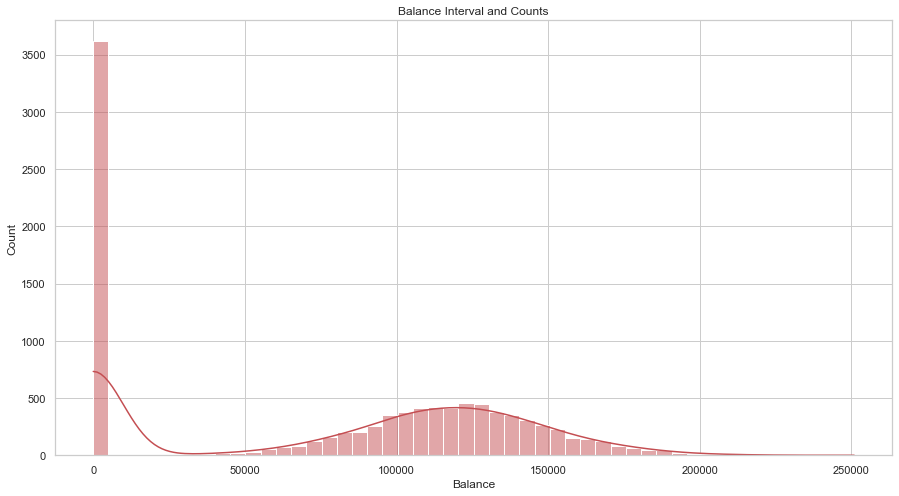

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.histplot(df['Balance'], color='r', bins = 50,kde = True).set_title('Balance Interval and Counts')

## Estimated Salary

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

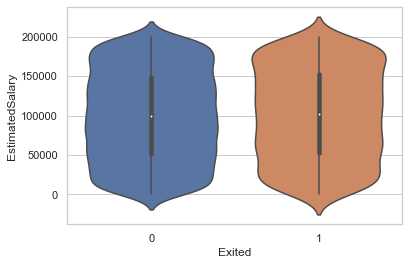

In [29]:
sns.violinplot("Exited", "EstimatedSalary", data = df)

Text(0.5, 1.0, 'EstimatedSalary Interval and Counts')

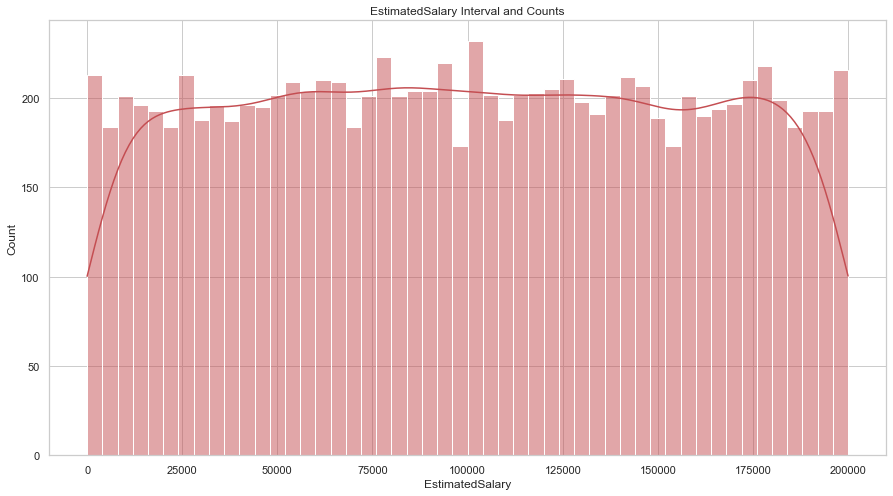

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.histplot(df['EstimatedSalary'], color='r', bins = 50, kde = True).set_title('EstimatedSalary Interval and Counts')

## Tenure

In [31]:
exited = df.loc[df["Exited"] == 1]
not_exited = df.loc[df["Exited"] == 0]
total = df["Tenure"].value_counts()

In [32]:
ex = exited["Tenure"].value_counts()
nex = not_exited["Tenure"].value_counts()

In [33]:
table_tenure = pd.DataFrame({'Exited = 1': ex, 'Exited = 0': nex, 'TOTAL': total})
table_tenure

Exited = 1  Exited = 0  TOTAL
0           95         318    413
1          232         803   1035
2          201         847   1048
3          213         796   1009
4          203         786    989
5          209         803   1012
6          196         771    967
7          177         851   1028
8          197         828   1025
9          213         771    984
10         101         389    490

## NumOfProducts

In [34]:
ex = exited["NumOfProducts"].value_counts()
nex = not_exited["NumOfProducts"].value_counts()
total = df["NumOfProducts"].value_counts()

In [35]:
table_NumOfProducts = pd.DataFrame({'Exited = 1': ex, 'Exited = 0': nex, 'TOTAL': total})
table_NumOfProducts

Exited = 1  Exited = 0  TOTAL
1        1409      3675.0   5084
2         348      4242.0   4590
3         220        46.0    266
4          60         NaN     60

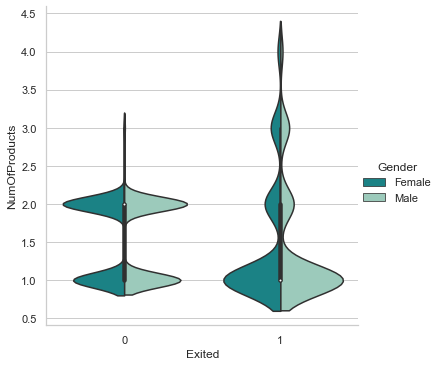

In [36]:
sns.catplot(x="Exited", y="NumOfProducts", hue = 'Gender',
            kind="violin", split=True, data=df, palette = colors[1:9])

## HasCrCard

In [37]:
ex = exited["HasCrCard"].value_counts()
nex = not_exited["HasCrCard"].value_counts()
total = df["HasCrCard"].value_counts()

In [38]:
table_HasCrCard = pd.DataFrame({'Exited = 1': ex, 'Exited = 0': nex, 'TOTAL': total})
table_HasCrCard

Exited = 1  Exited = 0  TOTAL
1        1424        5631   7055
0         613        2332   2945

<AxesSubplot:title={'center':'HasCrCard = 0'}, xlabel='Exited'>

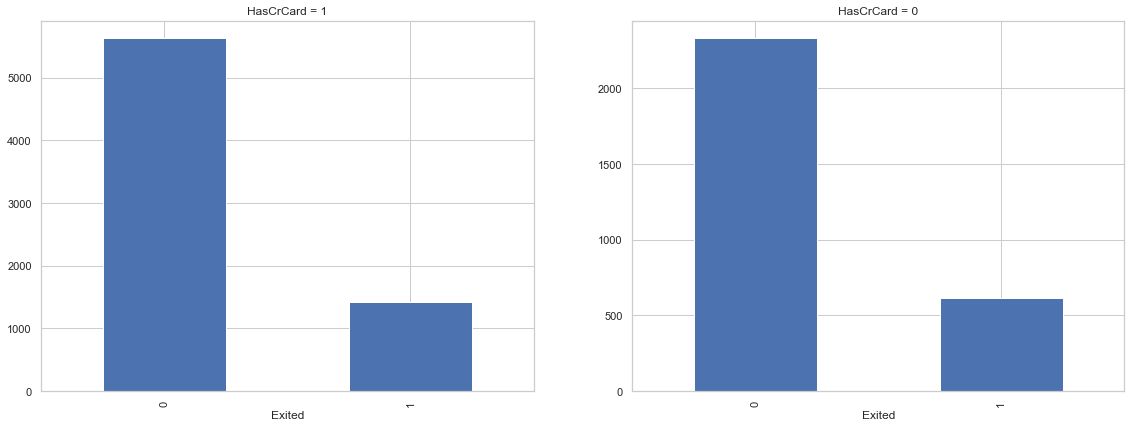

In [39]:
sns.set_style('whitegrid')
plt.figure(figsize=(30,15))
plt.subplot(2,3,1)
plt.title('HasCrCard = 1')
df.groupby('HasCrCard').Exited.value_counts().loc[1].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('HasCrCard = 0')
df.groupby('HasCrCard').Exited.value_counts().loc[0].plot(kind='bar')


## Correlation

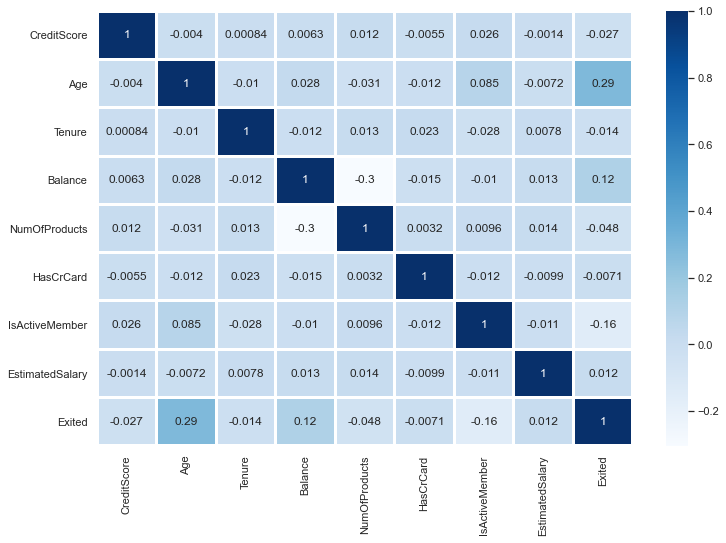

In [40]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths = 2,annot_kws={"fontsize":12})
plt.show()

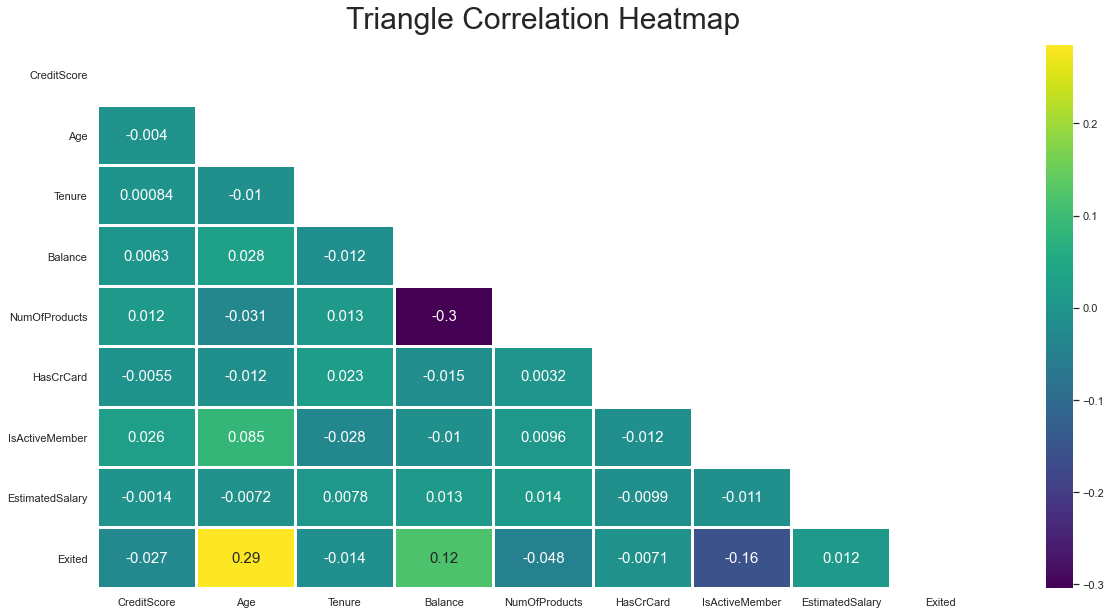

In [41]:
plt.figure(figsize=(20, 10))
sns.set_style('white')
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask,annot=True, cmap='viridis', linewidths = 2,annot_kws={"fontsize":15})
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':30}, pad=16);

# Data Preprocessing

### Missing Values

In [42]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Outlier Detection

In [43]:
#retrieved from: https://www.kaggle.com/kanncaa1/dataiteam-titanic-eda#Introduction

from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [44]:
numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >11
                        and col not in "CustomerId"]
df.loc[detect_outliers(df,numeric_variables)]

Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

# Encoding

In [45]:
categorical = (df.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['Geography', 'Gender']


In [46]:
encoding_list =  ['Geography', 'Gender']

one_hot_encoding_list = []
label_encoding_list = []

for i in range (0, len(encoding_list)):
    if(len(df[f'{encoding_list[i]}'].unique()) == 2):
        label_encoding_list.append(encoding_list[i])
    else:
        one_hot_encoding_list.append(encoding_list[i])
    print(f'Unique Values for {encoding_list[i]}', df[f'{encoding_list[i]}'].unique())

Unique Values for Geography ['France' 'Spain' 'Germany']
Unique Values for Gender ['Female' 'Male']


### One-Hot Encoding

In [47]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [48]:
for i in range(0, len(one_hot_encoding_list)):
    df[f'{one_hot_encoding_list[i]}'] = pd.Categorical(df[f'{one_hot_encoding_list[i]}'])
    dummies = pd.get_dummies(df[f'{one_hot_encoding_list[i]}'], prefix = f'{one_hot_encoding_list[i]}_encoded')
    df.drop([f'{one_hot_encoding_list[i]}'], axis=1, inplace=True)
    df = pd.concat([df, dummies], axis=1)

### Label Encoding

In [49]:
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_mapping)

In [50]:
df

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619       1   42       2       0.00              1          1   
1             608       1   41       1   83807.86              1          0   
2             502       1   42       8  159660.80              3          1   
3             699       1   39       1       0.00              2          0   
4             850       1   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771       0   39       5       0.00              2          1   
9996          516       0   35      10   57369.61              1          1   
9997          709       1   36       7       0.00              1          0   
9998          772       0   42       3   75075.31              2          1   
9999          792       1   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_encoded_France  \
0                  1        101348.88       1                         1   
1                  1        112542.58       0                         0   
2                  0        113931.57       1                         1   
3                  0         93826.63       0                         1   
4                  1         79084.10       0                         0   
...              ...              ...     ...                       ...   
9995               0         96270.64       0                         1   
9996               1        101699.77       0                         1   
9997               1         42085.58       1                         1   
9998               0         92888.52       1                         0   
9999               0         38190.78       0                         1   

      Geography_encoded_Germany  Geography_encoded_Spain  
0                             0                        0  
1                             0                        1  
2                             0                        0  
3                             0                        0  
4                             0                        1  
...                         ...                      ...  
9995                          0                        0  
9996                          0                        0  
9997                          0                        0  
9998                          1                        0  
9999                          0                        0  

[10000 rows x 13 columns]

# Feature Engineering

In [51]:
def qcut_function(column_name, label):
    """
    This function returns the qcut function with given parameters.

    Parameters
    ----------
    column_name : defines the column names of data frame.
    label : defines the amount of cut. 

    """        
    x = []
    for i in range(label):
        x += [i+1]
    new_column_name = "New" + column_name
    df[new_column_name] = pd.qcut(df[column_name].rank(method="first"), label, labels = x)

### CreditScore

In [52]:
print(f'Min CreditScore: {df["CreditScore"].min()}, Max CreditScore: {df["CreditScore"].max()}')
qcut_function("CreditScore", 6)

Min CreditScore: 350, Max CreditScore: 850


### Age

In [53]:
print(f'Min Age: {df["Age"].min()}, Max Age: {df["Age"].max()}')
qcut_function("Age", 10)

Min Age: 18, Max Age: 92


### Balance

In [54]:
print(f'Min Balance: {df["Balance"].min()}, Max Balance: {df["Balance"].max()}')
qcut_function("Balance", 10)

Min Balance: 0.0, Max Balance: 250898.09


### EstimatedSalary

In [55]:
print(f'Min EstimatedSalary: {df["EstimatedSalary"].min()}, Max EstimatedSalary: {df["EstimatedSalary"].max()}')
qcut_function("EstimatedSalary", 10)

Min EstimatedSalary: 11.58, Max EstimatedSalary: 199992.48


In [56]:
df

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619       1   42       2       0.00              1          1   
1             608       1   41       1   83807.86              1          0   
2             502       1   42       8  159660.80              3          1   
3             699       1   39       1       0.00              2          0   
4             850       1   43       2  125510.82              1          1   
...           ...     ...  ...     ...        ...            ...        ...   
9995          771       0   39       5       0.00              2          1   
9996          516       0   35      10   57369.61              1          1   
9997          709       1   36       7       0.00              1          0   
9998          772       0   42       3   75075.31              2          1   
9999          792       1   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_encoded_France  \
0                  1        101348.88       1                         1   
1                  1        112542.58       0                         0   
2                  0        113931.57       1                         1   
3                  0         93826.63       0                         1   
4                  1         79084.10       0                         0   
...              ...              ...     ...                       ...   
9995               0         96270.64       0                         1   
9996               1        101699.77       0                         1   
9997               1         42085.58       1                         1   
9998               0         92888.52       1                         0   
9999               0         38190.78       0                         1   

      Geography_encoded_Germany  Geography_encoded_Spain NewCreditScore  \
0                             0                        0              3   
1                             0                        1              2   
2                             0                        0              1   
3                             0                        0              5   
4                             0                        1              6   
...                         ...                      ...            ...   
9995                          0                        0              6   
9996                          0                        0              1   
9997                          0                        0              5   
9998                          1                        0              6   
9999                          0                        0              6   

     NewAge NewBalance NewEstimatedSalary  
0         7          1                  6  
1         7          5                  6  
2         7         10                  6  
3         6          1                  5  
4         8          8                  4  
...     ...        ...                ...  
9995      6          4                  5  
9996      5          4                  6  
9997      5          4                  3  
9998      8          5                  5  
9999      2          8                  2  

[10000 rows x 17 columns]

# Train-Test Split

In [57]:
from sklearn.model_selection import train_test_split

X = df.drop(['Exited'], axis = 1)
y = df.Exited

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

Total # of sample in whole dataset: 10000
**************************************************
Total # of sample in train dataset: 8000
Shape of X_train: (8000, 16)
**************************************************
Total # of sample in test dataset: 2000
Shape of X_test: (2000, 16)


In [58]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
import lightgbm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pipeline_LogisticRegression = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_LogisticRegression",LogisticRegression())])

pipeline_RandomForest = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_RandomForest",RandomForestClassifier())])

pipeline_DecisionTree = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_DecisionTree",DecisionTreeClassifier())])

pipeline_KNN = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_KNN",KNeighborsClassifier())])

pipeline_GBC = Pipeline([("scaler",StandardScaler()), (
                        "pipeline_GBC",GradientBoostingClassifier())])

pipeline_SGD = Pipeline([("scaler",StandardScaler()), 
                        ("pipeline_SGD",SGDClassifier(max_iter=5000, random_state=0))])

pipeline_LGBM = Pipeline([("scaler",StandardScaler()), 
                        ("pipeline_LGBM",lightgbm.LGBMClassifier())])

pipelines = [pipeline_LogisticRegression, pipeline_RandomForest, pipeline_DecisionTree, pipeline_KNN, pipeline_GBC, pipeline_SGD, pipeline_LGBM]

pipe_dict = {0: "LogisticRegression",1: "RandomForestClassifier", 2: "DecisionTreeClassifier",
            3: "KNeighborsClassifier", 4: "GradientBoostingClassifier", 5:"Stochastic Gradient Descent", 6: "LGBM"}

modelNames = ['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier', 'KNeighborsClassifier',
              'GradientBoostingClassifier', 'Stochastic Gradient Descent', 'LGBM']

i= 0
trainScores = []
validationScores = []
testScores = []

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    print(f'{pipe_dict[i]}')
    print("Train Score of %s: %f     " % (pipe_dict[i], pipe.score(X_train, y_train)*100))
    trainScores.append(pipe.score(X_train, y_train)*100)
    
    
    print("Test Score of %s: %f      " % (pipe_dict[i], pipe.score(X_test, y_test)*100))
    testScores.append(pipe.score(X_test, y_test)*100)
    print(" ")
    
    y_predictions = pipe.predict(X_test)
    conf_matrix = confusion_matrix(y_predictions, y_test)
    print(f'Confussion Matrix: \n{conf_matrix}\n')
    
    tn = conf_matrix[0,0]
    fp = conf_matrix[0,1]
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]

    total = tn + fp + tp + fn
    real_positive = tp + fn
    real_negative = tn + fp

    accuracy  = (tp + tn) / total # Accuracy Rate
    precision = tp / (tp + fp) # Positive Predictive Value
    recall    = tp / (tp + fn) # True Positive Rate
    f1score  = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp) # True Negative Rate
    error_rate = (fp + fn) / total # Missclassification Rate
    prevalence = real_positive / total
    miss_rate = fn / real_positive # False Negative Rate
    fall_out = fp / real_negative # False Positive Rate
    
    print('Evaluation Metrics:')
    print(f'Accuracy    : {accuracy}')
    print(f'Precision   : {precision}')
    print(f'Recall      : {recall}')
    print(f'F1 score    : {f1score}')
    print(f'Specificity : {specificity}')
    print(f'Error Rate  : {error_rate}')
    print(f'Prevalence  : {prevalence}')
    print(f'Miss Rate   : {miss_rate}')
    print(f'Fall Out    : {fall_out}')

    print("") 
    print(f'Classification Report: \n{classification_report(y_predictions, y_test)}\n')
    print("")

    print("*****"*20)
    i +=1

LogisticRegression
Train Score of LogisticRegression: 82.175000     
Test Score of LogisticRegression: 82.250000      
 
Confussion Matrix: 
[[1542  290]
 [  65  103]]

Evaluation Metrics:
Accuracy    : 0.8225
Precision   : 0.26208651399491095
Recall      : 0.6130952380952381
F1 score    : 0.3672014260249555
Specificity : 0.8417030567685589
Error Rate  : 0.1775
Prevalence  : 0.084
Miss Rate   : 0.3869047619047619
Fall Out    : 0.15829694323144106

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1832
           1       0.26      0.61      0.37       168

    accuracy                           0.82      2000
   macro avg       0.61      0.73      0.63      2000
weighted avg       0.90      0.82      0.85      2000



****************************************************************************************************
RandomForestClassifier
Train Score of RandomForestClassifier: 99.987500     
Test Score of Ran

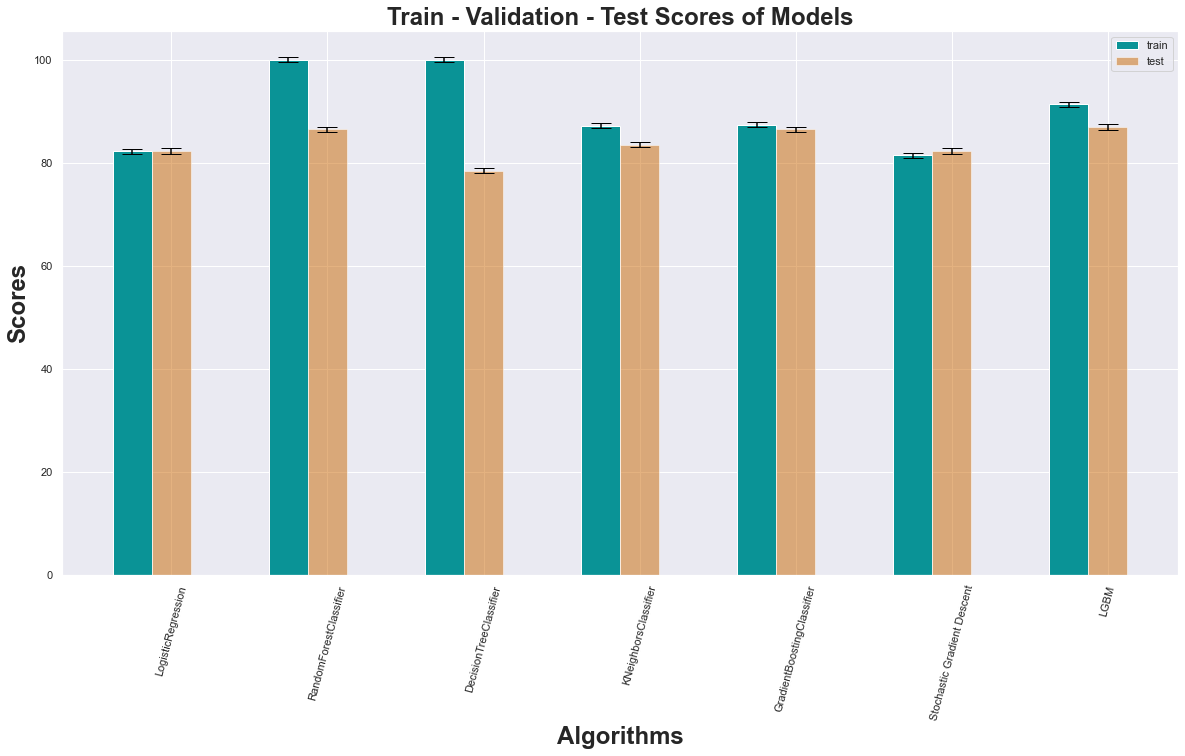

In [59]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = testScores

 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
plt.bar(r1, bars1, color=colors[1:2], width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color=colors[5:6], width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
 
modelNames = ['LogisticRegression','RandomForestClassifier',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'LGBM']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In [60]:
table = pd.DataFrame({'Model': modelNames, 'Train': trainScores, 'Test': testScores})
table

Model     Train   Test
0           LogisticRegression   82.1750  82.25
1       RandomForestClassifier   99.9875  86.50
2       DecisionTreeClassifier  100.0000  78.40
3         KNeighborsClassifier   87.1375  83.50
4   GradientBoostingClassifier   87.3375  86.45
5  Stochastic Gradient Descent   81.4125  82.25
6                         LGBM   91.3250  86.90

## Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

cv_results_acc = []
cv_results_std = []

for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, scoring = "accuracy", cv = 10)
    cv_results_acc.append(cv_score.mean()*100)
    cv_results_std.append(cv_score.std())
    print("%s: %f (%f)" % (pipe_dict[i], cv_score.mean()*100, cv_score.std()))

LogisticRegression: 82.187500 (0.007771)
RandomForestClassifier: 86.050000 (0.006851)
DecisionTreeClassifier: 78.425000 (0.011267)
KNeighborsClassifier: 82.725000 (0.008419)
GradientBoostingClassifier: 86.212500 (0.008083)
Stochastic Gradient Descent: 80.875000 (0.010000)
LGBM: 86.075000 (0.011404)


In [62]:
table_cv = pd.DataFrame({'Model': modelNames, 'CV Score': cv_results_acc, 'CV Score Std': cv_results_std})
table_cv

Model  CV Score  CV Score Std
0           LogisticRegression   82.1875      0.007771
1       RandomForestClassifier   86.0500      0.006851
2       DecisionTreeClassifier   78.4250      0.011267
3         KNeighborsClassifier   82.7250      0.008419
4   GradientBoostingClassifier   86.2125      0.008083
5  Stochastic Gradient Descent   80.8750      0.010000
6                         LGBM   86.0750      0.011404

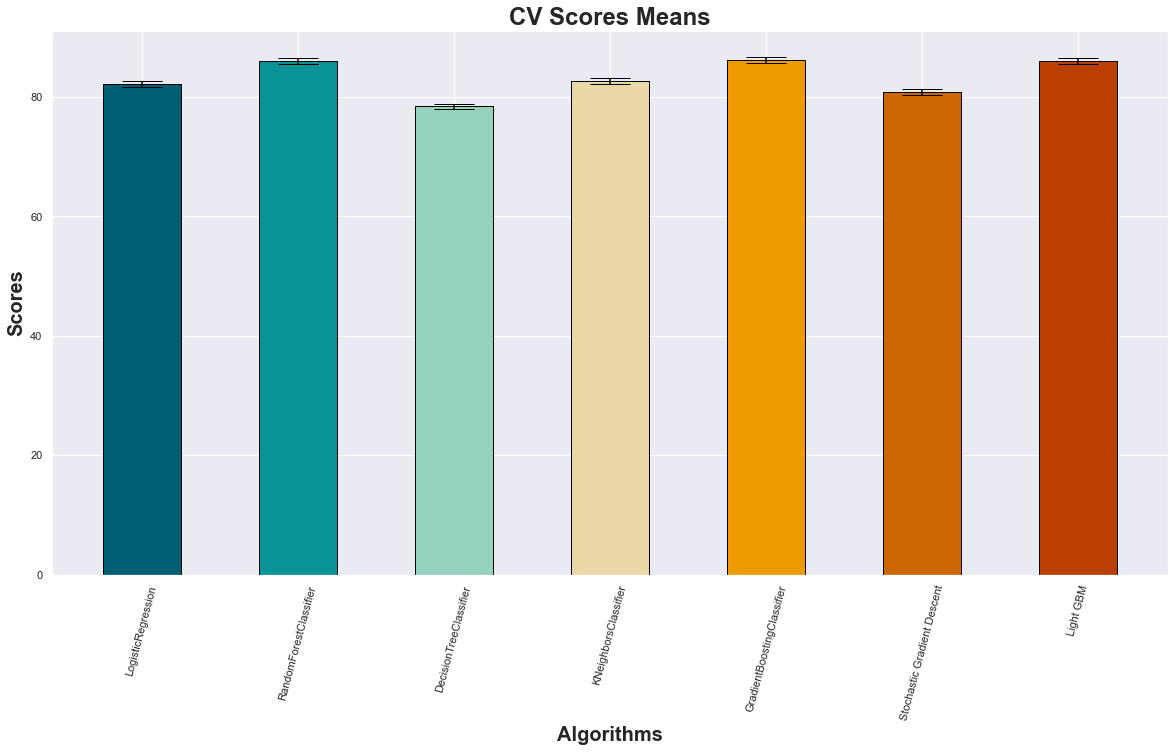

In [63]:
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.title('CV Scores Means', fontweight='bold', size = 24)

barWidth = 0.5
 
bars2 = cv_results_acc
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r2, bars2, color=colors, width=barWidth, edgecolor='black',  yerr=0.5, ecolor="black",capsize=20)

modelNames = ['LogisticRegression','RandomForestClassifier',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Light GBM']
    
plt.xlabel('Algorithms', fontweight='bold', size = 20)
plt.ylabel('Scores', fontweight='bold', size = 20)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
plt.show()

# Scaling

In [64]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# XGBoost Model

In [65]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)

train_score = xgb.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = xgb.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

[19:40:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train score of trained model: 95.8
Test score of trained model: 86.2


## ROC Curve

In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC' )
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [67]:
probs = xgb.predict_proba(X_test)
probs = probs[:, 1]

In [68]:
auc = roc_auc_score(y_test, probs)
print('AUC: ', auc*100)

AUC:  85.05979722936074


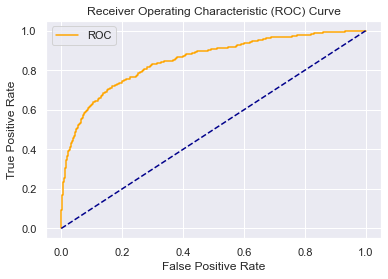

In [69]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

# LightGBM

In [70]:
lgbm = lightgbm.LGBMClassifier()
lgbm.fit(X_train, y_train)
pred = lgbm.predict(X_test)

train_score = lgbm.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = lgbm.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 91.325
Test score of trained model: 86.9


## ROC Curve

In [71]:
probs = lgbm.predict_proba(X_test)
probs = probs[:, 1]

In [72]:
auc = roc_auc_score(y_test, probs)
print('AUC: ', auc*100)

AUC:  86.87216075978027


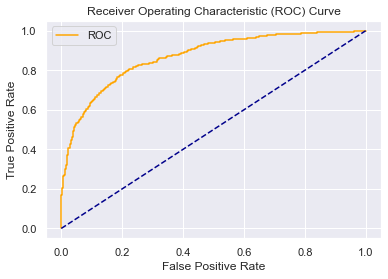

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

## Comparison

RandomForestClassifier
Old Shape: (10000, 16) New shape: (10000, 7)




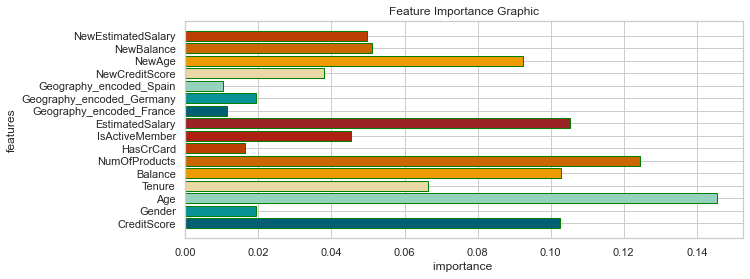

DecisionTreeClassifier
Old Shape: (10000, 16) New shape: (10000, 7)




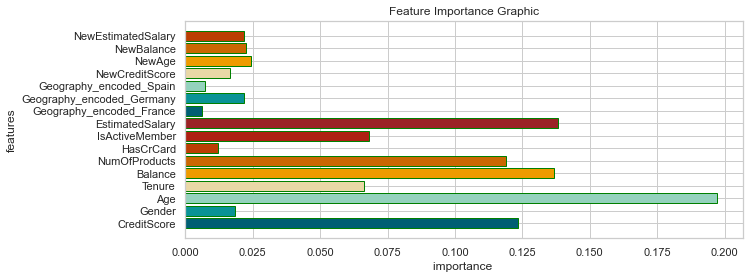

GradientBoostingClassifier
Old Shape: (10000, 16) New shape: (10000, 5)




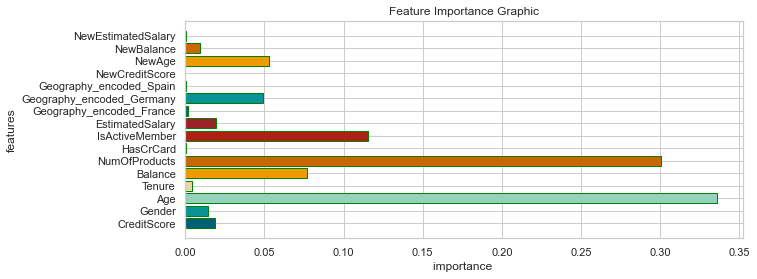

LightGBM
Old Shape: (10000, 16) New shape: (10000, 6)




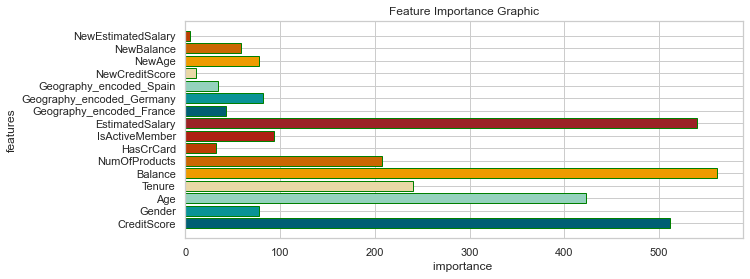

In [74]:
from sklearn.feature_selection import SelectFromModel
sns.set_style('whitegrid')

features = X.columns

models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LightGBM': lightgbm.LGBMClassifier(),
    
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

  imp_feature = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
  plt.figure(figsize=(10,4))
  plt.title("Feature Importance Graphic")
  plt.xlabel("importance ")
  plt.ylabel("features")
  plt.barh(imp_feature['Feature'],imp_feature['Importance'], color = colors, edgecolor = 'Green')
  plt.show()